In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 50)
pd.set_option('display.max_colwidth', 100)

In [3]:
data = pd.read_csv('AutoScout_data_cleaning_without_extras.csv')
data.head(3)

,make,model,body_type,cc,price,vat,km,registration,prev_owner,power_hp,vehicle_condition,previous_owners,Inspection_new,body_color,paintwork,body_color_original,upholstery,interior_color,door_nr,seat_nr,model_code,gear,displacement,cylinders,weight,fuel,consumption_comb,consumption_city,consumption_country,CO2_emission,emission_class,comfort_convenience,entertainment,Extras,safety_security
0,Audi,A1,Sedans,1.4,15770,VAT deductible,56013.0,2016.0,2.0,66.0,Used,2.0,Yes,Black,Metallic,Mythosschwarz,Cloth,Black,5.0,5.0,0588/BDF,Automatic,"1,422",3.0,"1,220",Diesel,3.8,4.3,3.5,99.0,Euro 6,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill H...","Bluetooth,Hands-free equipment,On-board computer,Radio","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog..."
1,Audi,A1,Sedans,1.8,14500,Price negotiable,80000.0,2017.0,NaN,141.0,Used,NaN,NaN,Red,NaN,NaN,Cloth,Grey,3.0,4.0,0588/BCY,Automatic,"1,798",4.0,"1,255",benzine,5.6,7.1,4.7,129.0,Euro 6,"Air conditioning,Automatic climate control,Hill Holder,Leather steering wheel,Lumbar support,Par...","Bluetooth,Hands-free equipment,On-board computer,Radio,Sound system","Alloy wheels,Sport seats,Sport suspension,Voice Control","ABS,Central door lock,Central door lock with remote control,Daytime running lights,Driver-side a..."
2,Audi,A1,Sedans,1.6,14640,VAT deductible,83450.0,2016.0,1.0,85.0,Used,1.0,NaN,Black,Metallic,mythosschwarz metallic,Cloth,Black,4.0,4.0,NaN,Automatic,"1,598",NaN,NaN,Diesel,3.8,4.4,3.4,99.0,Euro 6,"Air conditioning,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Multi...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Imm..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 15919 non-null  object 
 1   model                15919 non-null  object 
 2   body_type            15859 non-null  object 
 3   cc                   10851 non-null  float64
 4   price                15919 non-null  int64  
 5   vat                  11406 non-null  object 
 6   km                   14895 non-null  float64
 7   registration         14322 non-null  float64
 8   prev_owner           9091 non-null   float64
 9   power_hp             15831 non-null  float64
 10  vehicle_condition    15917 non-null  object 
 11  previous_owners      9279 non-null   float64
 12  Inspection_new       3932 non-null   object 
 13  body_color           15322 non-null  object 
 14  paintwork            10147 non-null  object 
 15  body_color_original  12145 non-null 

### İlk olarak body_type sütunundaki nan değerleri dolduralım.

In [5]:
data["body_type"].value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

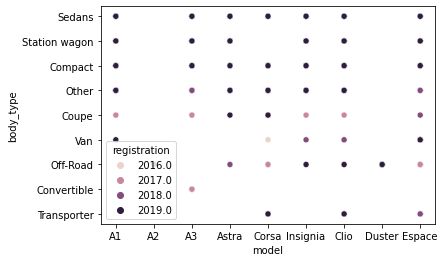

In [6]:
sns.scatterplot(x="model", y="body_type", hue="registration", data=data);

In [7]:
data[~data["body_type"].notna()][["model","registration","model_code","body_type"]]

,model,registration,model_code,body_type
3175,A3,2016.0,NaN,NaN
3255,A3,2016.0,NaN,NaN
3975,A3,2017.0,NaN,NaN
3997,A3,2017.0,NaN,NaN
4206,A3,2017.0,NaN,NaN
4297,A3,2017.0,NaN,NaN
4298,A3,2017.0,NaN,NaN
5718,Astra,2016.0,NaN,NaN
5938,Astra,2016.0,NaN,NaN
5940,Astra,2016.0,NaN,NaN


In [8]:
# 1.yöntem:

data["body_type"] = data["body_type"].fillna(data["body_type"].mode()[0])

In [36]:
# 2. yöntem: Bütün eksik body_type lara karşı gelen modeller için uygulamamız gerekir.

data.loc[data["model"]=="A3","body_type"].fillna(data[data["model"]=="A3"]["body_type"].mode()[0])

0        Sedans
1        Sedans
2        Sedans
3        Sedans
4        Sedans
         ...   
2609     Sedans
2610     Sedans
2611     Sedans
2612    Compact
2613     Sedans
Name: body_type, Length: 2614, dtype: object

In [9]:
# 3. yöntem:

for group in list(data["model"].unique()):
    cond = data["model"] == group
    mode = list(data[cond]["body_type"].mode())
    if mode != []:
        data.loc[cond, "body_type"] = data.loc[cond, "body_type"].fillna(data[cond]["body_type"].mode()[0])
    else :
        data.loc[cond, "body_type"] = data.loc[cond, "body_type"].fillna(data["body_type"].mode()[0])

In [ ]:
# 4. yöntem :

f= lambda x : x.mode().iloc[0]

data["body_type"] = data["body_type"].fillna(data.groupby("model")["body_type"].transform(f))

In [9]:
data["body_type"].value_counts(dropna=False)  # 1.yöntemi kullanırsak.

Sedans           7963
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [10]:
data["body_type"].value_counts(dropna=False)   # 3. ve 4. yöntemi kullanırsak aynı sonuca ulaşıyoruzb

Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

### vehicle_condition sütunundaki 2 nan değeri dolduralım. Değer sayısı az olduğundan dolayı km, price ve modele bakarak used olarak doldurduk.

In [11]:
data["vehicle_condition"].value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: vehicle_condition, dtype: int64

In [12]:
data.loc[~data["vehicle_condition"].notna()]

,make,model,body_type,cc,price,vat,km,registration,prev_owner,power_hp,vehicle_condition,previous_owners,Inspection_new,body_color,paintwork,body_color_original,upholstery,interior_color,door_nr,seat_nr,model_code,gear,displacement,cylinders,weight,fuel,consumption_comb,consumption_city,consumption_country,CO2_emission,emission_class,comfort_convenience,entertainment,Extras,safety_security
2765,Audi,A3,Sedans,2.0,17900,NaN,115137.0,2016.0,NaN,110.0,NaN,NaN,NaN,White,NaN,NaN,Cloth,Other,5.0,5.0,NaN,Automatic,"1,968",4.0,NaN,Diesel,4.5,5.3,4.1,118.0,Euro 6,Air conditioning,"Bluetooth,Hands-free equipment","Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock,Driver-side airbag,Isofix,Passenger-side airbag,Power steering,Side airbag..."
5237,Audi,A3,Sedans,1.6,25400,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,Grey,NaN,NaN,Cloth,Other,5.0,5.0,NaN,Automatic,"1,598",4.0,NaN,Diesel,3.9,4.1,3.7,103.0,Euro 6,Air conditioning,"Bluetooth,Hands-free equipment",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Isofix,Passenger-side airbag,Power steering,Side airbag..."


In [13]:
data.loc[~data["vehicle_condition"].notna(), "vehicle_condition"] = data.loc[~data["vehicle_condition"].notna(), "vehicle_condition"].fillna("Used")

In [14]:
data["vehicle_condition"].value_counts(dropna=False)

Used              11098
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: vehicle_condition, dtype: int64

### km sütunundaki nan değerleri dolduralım.

In [15]:
data["km"].value_counts(dropna=False)

10.0        1045
NaN         1024
1.0          367
5.0          170
50.0         148
            ... 
160542.0       1
20719.0        1
91910.0        1
39860.0        1
57889.0        1
Name: km, Length: 6690, dtype: int64

In [16]:
data[~data["km"].notna()].head(5)

,make,model,body_type,cc,price,vat,km,registration,prev_owner,power_hp,vehicle_condition,previous_owners,Inspection_new,body_color,paintwork,body_color_original,upholstery,interior_color,door_nr,seat_nr,model_code,gear,displacement,cylinders,weight,fuel,consumption_comb,consumption_city,consumption_country,CO2_emission,emission_class,comfort_convenience,entertainment,Extras,safety_security
743,Audi,A1,Sedans,NaN,25900,NaN,NaN,NaN,NaN,85.0,New,0.0,NaN,Black,NaN,NaN,Cloth,Black,5.0,4.0,NaN,Semi-automatic,999,3.0,"1,255",benzine,4.8,5.8,4.2,108.0,Euro 6d-TEMP,"Air conditioning,Automatic climate control,Electrically heated windshield,Electrical side mirror...","Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,USB","Alloy wheels,Sport suspension,Touch screen,Tuned car","ABS,Alarm system,Central door lock,Central door lock with remote control,Driver-side airbag,Emer..."
869,Audi,A1,Sedans,1.0,21300,VAT deductible,NaN,NaN,NaN,85.0,New,0.0,NaN,White,NaN,Bianco Cortina,NaN,NaN,5.0,4.0,NaN,Automatic,999,3.0,"1,165",benzine,4.4,5.4,3.8,102.0,Euro 6,"Air conditioning,Power windows",Radio,Alloy wheels,"ABS,Central door lock,Driver-side airbag,Electronic stability control,Immobilizer,Passenger-side..."
946,Audi,A1,Compact,NaN,21406,NaN,NaN,NaN,NaN,110.0,New,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,Automatic,"1,498",4.0,"1,180",benzine,5.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
977,Audi,A1,Compact,1.0,21200,VAT deductible,NaN,NaN,NaN,85.0,New,NaN,NaN,White,NaN,Cortinaweiß,Cloth,Black,4.0,4.0,0588/BHM,Automatic,999,NaN,NaN,benzine,4.8,5.9,4.2,110.0,Euro 6d-TEMP,"Air conditioning,Electrical side mirrors,Light sensor,Multi-function steering wheel,Power window...","Bluetooth,Hands-free equipment,Radio,USB",Alloy wheels,"ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Eme..."
980,Audi,A1,Compact,NaN,21100,NaN,NaN,NaN,NaN,85.0,New,0.0,NaN,Yellow,Metallic,NaN,NaN,NaN,5.0,5.0,NaN,Automatic,NaN,4.0,NaN,benzine,NaN,NaN,NaN,NaN,NaN,"Air conditioning,Heads-up display,Power windows,Split rear seats",Radio,Alloy wheels,"ABS,Alarm system,Central door lock,Driver-side airbag,Fog lights,Immobilizer,Power steering,Side..."


In [14]:
data.groupby(["model", "body_type", "vehicle_condition"]).price.describe().head(80)   #"registration" ilave edelim.

count  \
model body_type     vehicle_condition           
A1    Compact       Demonstration        75.0   
                    Employee's car       79.0   
                    New                 248.0   
                    Pre-registered       19.0   
                    Used                618.0   
      Coupe         Used                  2.0   
      Other         Demonstration         2.0   
                    Employee's car        2.0   
                    New                   1.0   
                    Pre-registered        1.0   
                    Used                  7.0   
      Sedans        Demonstration        57.0   
                    Employee's car      115.0   
                    New                  79.0   
                    Pre-registered      126.0   
                    Used               1161.0   
      Station wagon Employee's car        1.0   
                    Used                 20.0   
      Van           Demonstration         1.0   
A2    Off-Road      Employee's car        1.0   
A3    Compact       Demonstration         3.0   
                    Employee's car        2.0   
                    New                  14.0   
                    Pre-registered        2.0   
                    Used                161.0   
      Convertible   Employee's car        1.0   
                    Used                  7.0   
      Coupe         Employee's car        1.0   
                    Used                  3.0   
      Other         Employee's car        2.0   
                    New                   3.0   
                    Used                 11.0   
      Sedans        Demonstration        52.0   
                    Employee's car      219.0   
                    New                 246.0   
                    Pre-registered      294.0   
                    Used               1794.0   
      Station wagon Demonstration         7.0   
                    Employee's car        3.0   
                    New                  63.0   
                    Pre-registered        4.0   
                    Used                205.0   
Astra Compact       Demonstration        16.0   
                    New                  19.0   
                    Pre-registered        6.0   
                    Used                144.0   
      Coupe         Demonstration         1.0   
                    Used                  1.0   
      Off-Road      Used                  1.0   
      Other         Demonstration         1.0   
                    New                   3.0   
                    Pre-registered        3.0   
                    Used                 60.0   
      Sedans        Demonstration        76.0   
                    Employee's car       65.0   
                    New                 127.0   
                    Pre-registered       77.0   
                    Used                708.0   
      Station wagon Demonstration        71.0   
                    Employee's car       87.0   
                    New                 106.0   
                    Pre-registered       39.0   
                    Used                915.0   
Clio  Compact       Demonstration        27.0   
                    Employee's car       21.0   
                    New                  59.0   
                    Pre-registered       77.0   
                    Used                300.0   
      Coupe         Used                  1.0   
      Off-Road      Demonstration         1.0   
                    Used                  1.0   
      Other         Demonstration        13.0   
                    Employee's car        1.0   
                    New                   4.0   
                    Pre-registered        2.0   
                    Used                 31.0   
      Sedans        Demonstration        30.0   
                    Employee's car       31.0   
                    New                  38.0   
                    Pre-registered      135.0   

                     

In [15]:
data[~data["km"].notna()].groupby(["model", "body_type", "vehicle_condition"])["price"].mean()

model     body_type      vehicle_condition
A1        Compact        New                  23996.264045
          Other          New                  21850.000000
          Sedans         Employee's car       27900.000000
                         New                  23336.560000
                         Pre-registered       24144.600000
A3        Compact        New                  25582.500000
          Other          New                  25990.000000
          Sedans         New                  24304.400000
                         Pre-registered       25692.585366
                         Used                 23695.000000
          Station wagon  New                  23558.666667
Astra     Compact        Demonstration        18240.000000
                         New                  16636.600000
                         Used                 15126.666667
          Coupe          Demonstration        29990.000000
          Other          New                  16456.666667
          Sed

In [16]:
data[data["km"].notna()].groupby(["model", "body_type", "vehicle_condition"])["price"].mean().head(50)

model  body_type      vehicle_condition
A1     Compact        Demonstration        23404.546667
                      Employee's car       19955.455696
                      New                  21999.171429
                      Pre-registered       23055.000000
                      Used                 16758.276699
       Coupe          Used                 14925.000000
       Other          Demonstration        26400.000000
                      Employee's car       16900.000000
                      Pre-registered       25900.000000
                      Used                 21712.857143
       Sedans         Demonstration        22829.087719
                      Employee's car       20076.052632
                      New                  22430.482759
                      Pre-registered       23862.318966
                      Used                 17408.005168
       Station wagon  Employee's car       28890.000000
                      Used                 17257.450000
       V

In [13]:
data[data["body_type"].notna()][["model","registration","model_code","body_type"]]

,model,registration,model_code,body_type
0,A1,2016.0,0588/BDF,Sedans
1,A1,2017.0,0588/BCY,Sedans
2,A1,2016.0,NaN,Sedans
3,A1,2016.0,NaN,Sedans
4,A1,2016.0,0588/BDF,Sedans
...,...,...,...,...
15914,Espace,NaN,NaN,Van
15915,Espace,2019.0,0000/000,Van
15916,Espace,2019.0,NaN,Van
15917,Espace,2019.0,NaN,Van
